# Black hole Christoffel symbols

In [2]:
import matplotlib.pyplot as plt  # Graphical module
import matplotlib
#from matplotlib.widgets import Slider  # TODO: use it for offset GUI
import numpy as np  # Use for matrices and list
from scipy.interpolate import interp1d  # Use for interpolation
from scipy.integrate import solve_ivp  # Integrate ord diff eqs
from scipy.constants import pi  # 3.141592653589793
from scipy.constants import c  # Speed light vaccum = 299792458 m/s
from scipy.constants import G  # Newton constant = 6.67408e-11 m3/Kg/s2
from scipy.constants import au  # sun-earth distance m = 149597870691 m
from PIL import Image  # Use to open, modify and save images
from PIL import ImageDraw
import sympy as smp

### Implement the Schwarszchild metric

In [ ]:
M,t,r,theta,phi,G, c = smp.symbols(" M t r theta phi G c")

coordinates = [t,r,theta,phi]
R_s = smp.symbols('R')
tau = smp.symbols('tau')

## Define the schwarzchild metric 
def schwarzschild_metric(row_idx:int, col_idx:int): 
    g_00 = -(1 - R_s/r)
    g_11 = 1/(1 - R_s/r)
    g_22 = r**2
    g_33 = r**2*smp.sin(theta)**2
    
    metric_tensor = ([[g_00,0 ,0 ,0],
                     [0 ,g_11, 0, 0],
                     [0 ,0 ,g_22, 0],
                     [0 ,0 ,0 ,g_33]])
    
    return metric_tensor[row_idx][col_idx]

## Find the metric's derivative 
def metric_derivative(i, j, k):
    derivative = smp.diff(schwarzschild_metric(i, j), coordinates[k])
    return derivative 

## Find the inverse of the metric which is needed for the Christoffel symbol 
def metric_inverse(i, j):
    g_uv = smp.Matrix([[schwarzschild_metric(0, 0), schwarzschild_metric(0, 1), schwarzschild_metric(0, 2), schwarzschild_metric(0, 3)],
                       [schwarzschild_metric(1, 0), schwarzschild_metric(1, 1), schwarzschild_metric(1, 2), schwarzschild_metric(1, 3)],
                       [schwarzschild_metric(2, 0), schwarzschild_metric(2, 1), schwarzschild_metric(2, 2), schwarzschild_metric(2, 3)],
                       [schwarzschild_metric(3, 0), schwarzschild_metric(3, 1), schwarzschild_metric(3, 2), schwarzschild_metric(3, 3)]])
    guv = g_uv.inv(method='LU')[i, j]
    return guv

## Define the christoffel symbol 
def gamma(i, j, k):
    chris = 0
    for l in range(4):
        chris += 0.5 * metric_inverse(i, l) * (metric_derivative(k, l, j) + metric_derivative(l, j, k) - metric_derivative(j, k, l))
    
    return smp.simplify(chris)


## solve the christoffel symbol problems 
christoffel_symbols = []
for a in range(4):
    for b in range(4):
        for c in range(4):
            gamma_value = gamma(a, b, c)
            if gamma_value != 0:
                christoffel_symbols.append((a, b, c, gamma_value))

# Substitute M = 0 and theta = pi/2
# simplified_christoffel_symbols = []
# for (a, b, c, gamma_value) in christoffel_symbols:
#     simplified_value = gamma_value.subs([(theta, pi/2), (c, 1), (G, 1)])
#     if abs(simplified_value.evalf()) !=0: #Treat small numerical values as zero
#         simplified_christoffel_symbols.append((a, b, c, simplified_value))

# Print the non-zero simplified Christoffel symbols
for (a, b, c, gamma_value) in christoffel_symbols:
    print(f"Gamma[{a}, {b}, {c}] = {gamma_value}")

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import time
from tqdm import trange

# Simple test case: exponential decay (has analytical solution)
def decay_system(t, y):
    return -0.5 * y

# Analytical solution
def analytical_solution(t, y0):
    return y0 * np.exp(-0.5 * t)

# Test setup
t_span = [0, 100]
t_eval = np.linspace(0, 100, 1000)
y0 = [1.0]
n_instances = 5000

# Timing for numerical solution
print("Running numerical integration...")
start_num = time.time()
t_num = trange(n_instances, desc='Numerical', leave=True)
for i in t_num:
    t_num.set_description(f"Numerical Integration (iteration {i})")
    t_num.refresh()
    sol = solve_ivp(decay_system, t_span, y0, t_eval=t_eval, method='RK45')
end_num = time.time()

# Timing for analytical solution
print("\nRunning analytical solution...")
start_ana = time.time()
t_ana = trange(n_instances, desc='Analytical', leave=True)
for i in t_ana:
    t_ana.set_description(f"Analytical Solution (iteration {i})")
    t_ana.refresh()
    sol_analytical = analytical_solution(t_eval, y0[0])
end_ana = time.time()

numerical_time = end_num - start_num
analytical_time = end_ana - start_ana

print(f"\nNumerical integration time: {numerical_time:.2f} seconds")
print(f"Analytical solution time: {analytical_time:.2f} seconds")
print(f"Speed difference: {numerical_time/analytical_time:.1f}x slower")

Running numerical integration...


Numerical Integration (iteration 9999): 100%|███████████████████████████████████| 10000/10000 [01:07<00:00, 147.92it/s]



Running analytical solution...


Analytical Solution (iteration 9933):  99%|█████████████████████████████████████▌| 9900/10000 [00:15<00:00, 671.65it/s]

In [ ]:
# Define symbols
M, t, r, theta, phi, G, c, a = smp.symbols("M t r theta phi G c a")
coordinates = [t, r, theta, phi]
tau = smp.symbols('tau')

# Kerr metric components
def kerr_metric(row_idx, col_idx):
    sigma = r**2 + (a * smp.cos(theta))**2
    delta = r**2 - 2 * M * r + a**2
    
    g_tt = -(1 - (2 * M * r / sigma))
    g_rr = sigma / delta
    g_tt = -(1 - 2*M*r/sigma)
    g_rtheta = 0
    g_rphi = 0
    g_thettheta = sigma
    g_thetphi = 0
    g_phiphi = (r**2 + a**2 + (2 * M * r * a**2 * smp.sin(theta)**2 / sigma)) * smp.sin(theta)**2
    g_tphi = -(2 * M * r * a * smp.sin(theta)**2 / sigma)
    
    metric_tensor = [[g_tt, 0, 0, g_tphi],
                     [0, g_rr, 0, 0],
                     [0, 0, g_thettheta, 0],
                     [g_tphi, 0, 0, g_phiphi]]
    
    return metric_tensor[row_idx][col_idx]

# Find the metric's derivative
def metric_derivative(i, j, k):
    derivative = smp.diff(kerr_metric(i, j), coordinates[k])
    return derivative

# Find the inverse of the metric which is needed for the Christoffel symbol
def metric_inverse(i, j):
    g_uv = smp.Matrix([[kerr_metric(0, 0), kerr_metric(0, 1), kerr_metric(0, 2), kerr_metric(0, 3)],
                       [kerr_metric(1, 0), kerr_metric(1, 1), kerr_metric(1, 2), kerr_metric(1, 3)],
                       [kerr_metric(2, 0), kerr_metric(2, 1), kerr_metric(2, 2), kerr_metric(2, 3)],
                       [kerr_metric(3, 0), kerr_metric(3, 1), kerr_metric(3, 2), kerr_metric(3, 3)]])
    guv = g_uv.inv(method='LU')[i, j]
    return guv

# Define the Christoffel symbol
def gamma(i, j, k):
    chris = 0
    for l in range(4):
        chris += 0.5 * metric_inverse(i, l) * (metric_derivative(k, l, j) + metric_derivative(l, j, k) - metric_derivative(j, k, l))
    
    return smp.simplify(chris)

# Solve the Christoffel symbol problems
christoffel_symbols = []
for a in range(4):
    for b in range(4):
        for c in range(4):
            gamma_value = gamma(a, b, c)
            if gamma_value != 0:
                christoffel_symbols.append((a, b, c, gamma_value))

# Print the non-zero simplified Christoffel symbols
for (a, b, c, gamma_value) in christoffel_symbols:
    print(f"Gamma[{a}, {b}, {c}] = {gamma_value}")

# Code for relativistic aberration version 1, testing. 

In [3]:
import numpy as np 
from manim import * 
from scipy.constants import c 

In [6]:
def transform_theta_obs(theta, velocity, light = c):
      beta = velocity / light
      gamma = 1 / np.sqrt(1-beta**2)
      numer = np.sin(theta)
      denom = gamma * (np.cos(theta) + beta)
      theta_p = np.arctan(numer / denom)
      return theta_p


The angle is 20.000008571513593
The altered angle from observers is 0.01428751494149555 deg


In [31]:
%%manim -qm Aberration_Doppler

class Aberration_Doppler(Scene):
    def construct(self):
        # Define initial angles for 12 arrows distributed symmetrically
        velocity = 0.5 * c
        initial_angles = np.linspace(0, 2 * np.pi, 10, endpoint=False)
        
        # Create arrows at the initial angles
        arrows = VGroup()
        for angle in initial_angles:
            arrow = Arrow(start=2 * np.array([np.cos(angle), np.sin(angle), 0]), end=ORIGIN, color=YELLOW, tip_length = 0.2)
            arrows.add(arrow)
        
        arrows.shift(DOWN * 1) 
        self.play(FadeIn(arrows))
        self.wait(1)
        
        transformed_arrows = VGroup()
        for arrow, angle in zip(arrows, initial_angles):
            transformed_angle = transform_theta_obs(angle, velocity)
            print(f'The initial angle is {angle} and transformed angle is {transformed_angle}') 
            transformed_arrow = Arrow(start=2 * np.array([np.cos(transformed_angle), np.sin(transformed_angle), 0]), end=ORIGIN, 
                                      color=YELLOW, tip_length = 0.2)
            transformed_arrows.add(transformed_arrow)
        
        # Update arrows
        self.play(Transform(arrows, transformed_arrows))
        self.wait(1)
        
        

[06/25/24 00:09:09] INFO     Animation 0 : Using cached data (hash :                           ]8;id=703191;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=168697;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             274514146_576050720_223132457)                                                        

                    INFO     Animation 1 : Using cached data (hash :                           ]8;id=233427;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=529197;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             2789044632_345352296_1680371147)                                                      

The initial angle is 0.0 and transformed angle is 0.0
The initial angle is 0.6283185307179586 and transformed angle is 0.3708745639098401
The initial angle is 1.2566370614359172 and transformed angle is 0.7943539491630279
The initial angle is 1.8849555921538759 and transformed angle is 1.3429459284321021
The initial angle is 2.5132741228718345 and transformed angle is -1.0252003549146036
The initial angle is 3.141592653589793 and transformed angle is -2.1211504774498136e-16
The initial angle is 3.7699111843077517 and transformed angle is 1.0252003549146034
The initial angle is 4.39822971502571 and transformed angle is -1.3429459284321024
The initial angle is 5.026548245743669 and transformed angle is -0.7943539491630282
The initial angle is 5.654866776461628 and transformed angle is -0.3708745639098402


[06/25/24 00:09:10] INFO     Animation 2 : Partial movie file written in                   ]8;id=896620;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=182899;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\720p30\partial_movie_files                         
                             \Aberration_Doppler\2789044632_1433972074_282393003.mp4'                              

                    INFO     Animation 3 : Partial movie file written in                   ]8;id=302701;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=561058;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Bowen\media\videos\Bowen\720p30\partial_movie_files                         
                             \Aberration_Doppler\2789044632_345352296_2252371274.mp4'                              

                    INFO     Combining to Movie file.                                      ]8;id=359231;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=190225;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=643263;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=562240;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'C:\Users\Bowen\media\videos\Bowen\720p30\Aberration_Doppler.                         
                             mp4'                                                                                  
                                                                                                                   

                    INFO     Rendered Aberration_Doppler                                               ]8;id=921711;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=655084;file://C:\Users\Bowen\miniconda3\envs\gameenv\Lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 4 animations                                                                   

# Code for trying to plot things out for the BlackHole Scenes. 

In [99]:
#### Helper functions
def spherical_to_cartesian(theta, phi, r = 1):
    """Convert spherical coordinates to cartesian."""
    x = r*np.sin(theta) * np.cos(phi)
    y = r*np.sin(theta) * np.sin(phi)
    z = r*np.cos(theta)
    return x, y, z

def cartesian_to_spherical(x, y, z, camera_position : np.array):
    """Convert 3D cartesian points into a spherical coordinate system"""
    r = np.sqrt((x - camera_position[0])**2 + (y-camera_position[1])**2 + (z-camera_position[2])**2)
    theta = np.arcsin(z / r)
    phi = np.arctan2(y, (x-camera_position[0]))
    return r, theta, phi


def rotation_matrix(beta):
    """
    This is involved in rotating the camera to view the black hole and the matrix involved in it.
    Source: https://stackoverflow.com/questions/6802577/rotation-of-3d-vector
    """
    Rx = np.array([[1, 0, 0],
                   [0, np.cos(beta), -np.sin(beta)],
                   [0, np.sin(beta), np.cos(beta)]])

    return Rx

def interpolate(x_pivot, f_pivot, kind='cubic'):
    """Create interpolation data to reduce computation time."""
    interpolation = interp1d(x_pivot, f_pivot,
                             kind=kind, bounds_error=False)
    return interpolation

def adjust_phi(phi):
    """
    Adjust the phi angle.
    If phi is above 90 degrees, subtract by 90 degrees (pi/2 radians).
    If negative, add 90 degrees (pi/2 radians).
    """
    phi = np.where(phi > np.pi/2, phi - np.pi/2, phi)
    phi = np.where(phi < 0, phi + np.pi/2, phi)
    return phi.item()

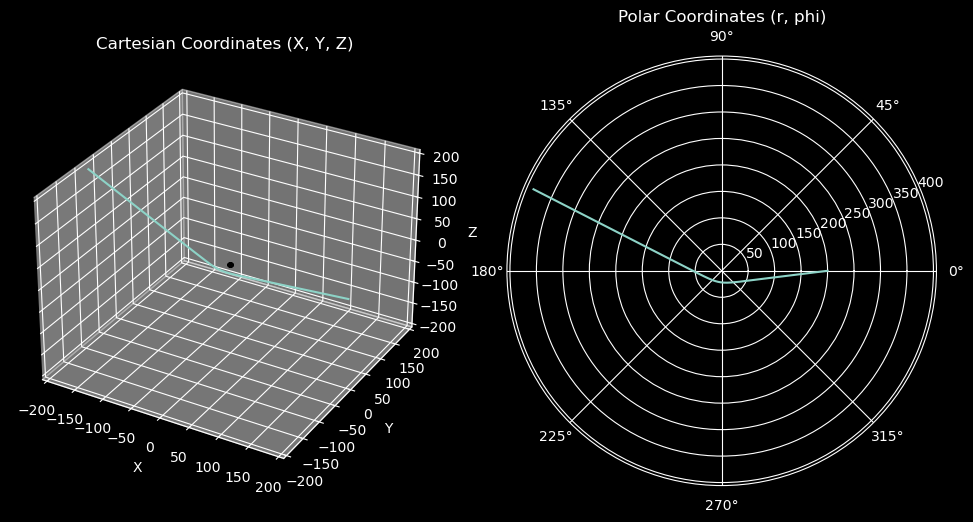

In [121]:
# Constants
Rs = 5
D = 200
R_isco = 1.5 * Rs            ## Because this is the schwarszchild blackhole

def photon_geodesic_eq(phi, u):
    """Represent the differential equation: d²u(ɸ)/dɸ² = 3/2 * Rs * u²(ɸ) - u(ɸ) by splitting it into 2 first order ODEs"""
    v0 = u[1]  # corresponds to u'
    v1 = 3/2 * Rs * u[0]**2 - u[0]  # corresponds to u"
    return v0, v1

def stop_(phi, u):
    """Stop solver if radius < black hole ISCO"""
    with np.errstate(all='ignore'):
        return 1/u[0] - Rs
stop_.terminal = True
    
def solver(alpha, num_points=8000):
    """Solve the differential equation for a static black hole using solve_ivp."""
    if alpha == 0:
        r = [0]
        phi = [0]
        return r, phi
    elif alpha == 180:
        r = [D]  # Return the original distance of the camera
        phi = [0]  # Return the phi as 180 because there is literally no deviation
        return r, phi
    else:
        if alpha < 0: 
            alpha = np.abs(alpha)    
            max_angle = 20 * np.pi
            y0 = [1/D, 1/(D * np.tan(np.radians(alpha)))]
            t_eval = np.linspace(0, max_angle, num_points)
            sol = solve_ivp(fun=photon_geodesic_eq, t_span=[0, max_angle], y0=y0, method='Radau', t_eval=t_eval, events=stop_)
            phi = np.array(sol.t)
            r = np.abs(1 / sol.y[0, :])
            return r, -phi
        else: 
            max_angle = 20 * np.pi
            y0 = [1/D, 1/(D * np.tan(np.radians(alpha)))]
            t_eval = np.linspace(0, max_angle, num_points)
            sol = solve_ivp(fun=photon_geodesic_eq, t_span=[0, max_angle], y0=y0, method='Radau', t_eval=t_eval, events=stop_)
            phi = np.array(sol.t)
            r = np.abs(1 / sol.y[0, :])
            return r, phi
            
    
def check_plot(angle_to_consider, limit = D):
    '''
        Function simply used to check if things make sense so far. 
    '''
    cam = [D, 0, 0]
    r, phi = solver(angle_to_consider)
    boole = r < limit
    r = r[boole]
    phi = phi[boole]
    x, y, z = spherical_to_cartesian(np.pi/2, phi, r)
    # Plotting
    fig = plt.figure(figsize=(10, 5))
    z = np.zeros_like(z)  # Because of python having 0 being stored into really tiny numbers instead I wrote that
    # Plot in Cartesian coordinates (3D)
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot3D(x, y, z)
    ax1.set_title('Cartesian Coordinates (X, Y, Z)')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_xlim(-D, D)
    ax1.set_ylim(-D, D)
    ax1.set_zlim(-D, D)
    ## Add the BH 
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x_black = Rs * np.outer(np.cos(u), np.sin(v))
    y_black = Rs * np.outer(np.sin(u), np.sin(v))
    z_black = Rs * np.outer(np.ones(np.size(u)), np.cos(v))
    ax1.plot_surface(x_black, y_black, z_black, color='black', label='blackhole')

    # Plot in polar coordinates
    ax2 = fig.add_subplot(122, projection='polar')
    ax2.plot(phi, r)  # Swapped the order of phi and r
    ax2.set_title('Polar Coordinates (r, phi)')
    ax2.set_theta_zero_location('E')  # Set 0 degrees to the top

    plt.tight_layout()
    plt.show()

    
def refine_alpha(lower_bound, upper_bound, gradation):
    """Helper function to refine the alpha value within the given bounds."""
    for angle in np.arange(lower_bound, upper_bound, gradation):
        photon_radii = solver(angle)[0]
        if photon_radii[-1] > R_isco:
            return angle
    return upper_bound  # Return the upper bound if no angle found in the range
    

def find_minimum_deviation(sig_fig = 5):
    """ We need this function to determine the values of alpha where a photon
        with backwards ray tracing gets captured by the blackhole. This is an 
        iterative process that needs to be done. 
    """
    # Initial coarse search
    gradation = 1
    upper_bound = 0

    for angle in np.arange(1, 180, gradation):
        photon_radii = solver(angle)[0]
        if photon_radii[-1] > R_isco:
            upper_bound = angle
            break

    # Refine search with increasing precision
    for _ in range(sig_fig):  # Refine three times for increasing significant figures
        lower_bound = upper_bound - gradation
        upper_bound = refine_alpha(lower_bound, upper_bound, gradation / 10)
        gradation /= 10
    
    alpha_min = upper_bound
    return alpha_min 
        
def photon_trajectories(kind = 'linear', num_points = 100, no_computations = 6):
    """Compute several photons trajectories in order to interpolate the possibles trajectories and gain in execution time.
        This photon_trajectories method relies on geometry of the backwards-ray tracing method otherwise it doesn't work. 
    """
    # OPTIMIZE: take too much time due to too much solver call
    alpha_min = find_minimum_deviation()
    alpha_finder = 180
    
    seen_angle = np.array([])
    deviated_angle = np.array([])

    booli = False  # avoid points from the first loop to exceed points from the second loop
    points = num_points  # careful with this if using kind=linear
    
    for i in range(no_computations):

        for alpha in np.linspace(alpha_finder, alpha_min,
                                 num=int(points), endpoint=booli):
        
            r, phi = solver(alpha)
        
            if r[-1] > R_isco:  # if not capture by black hole
                seen_angle = np.append(seen_angle, 180-alpha)
                dev_angle = phi[-1] + np.arcsin(D/r[-1]*np.sin(phi[-1]))
                dev_angle = np.degrees(dev_angle)
                deviated_angle = np.append(deviated_angle, dev_angle)

        if kind == 'linear':
            alpha_finder = alpha_min + (alpha_finder - alpha_min)/(points/3 + 1) # start a more precise cycle from last point
            
        else:
            alpha_finder = alpha_min + (alpha_finder - alpha_min)/(points + 1) # start a more precise cycle from last point

        points = num_points / 4   

        if i == no_computations - 2:
            booli = True  # allow to display the last point

    return seen_angle, deviated_angle   

check_plot(-7.12501635, limit = 2 * D) 
    


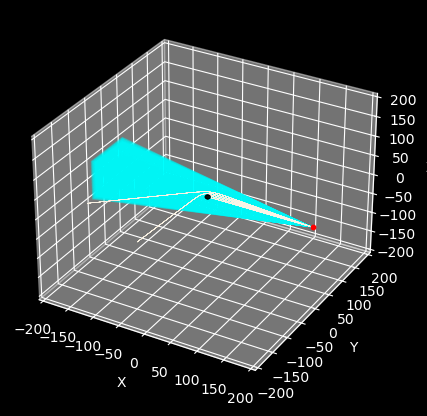

In [132]:
# Define camera position and image plane
# Define camera position and image plane
from mpl_toolkits.mplot3d import Axes3D

camera_position = np.array([D, 0, 0])

# Define the image plane
camera_pos = np.array([D, 0, 0])
image_center = np.array([-D, 0, 0])

image_size = 100 
half_size = image_size // 2
y = np.linspace(-half_size, half_size, image_size)
z = np.linspace(-half_size, half_size, image_size)
Y, Z = np.meshgrid(y, z)
X = np.full_like(Y, image_center[0])

# Define angles for light rays (in degrees)
angles = np.arange(10,60,2)
# Placeholder for storing trajectories
trajectories = []

# Calculate trajectories for each angle
for angle in angles:
    r, phi = solver(angle)
    boole = r < D*1.5 
    r = r[boole]
    phi = phi[boole]
    x, y, z = spherical_to_cartesian(np.pi/2, phi, r)
    z = np.zeros_like(z)
    trajectories.append((x, y, z))

# Apply rotation matrices to simulate different light ray angles
def rotate_along_x(x, y, z, theta):
    theta = np.radians(theta)
    R_x = np.array([[1, 0, 0],
                    [0, np.cos(theta), -np.sin(theta)],
                    [0, np.sin(theta), np.cos(theta)]])
    xyz = np.array([x, y, z])
    xyz_rot = R_x @ xyz
    return xyz_rot[0], xyz_rot[1], xyz_rot[2]

# Create the 3D plot
plt.style.use('dark_background')
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-D, D)
ax.set_ylim(-D, D)
ax.set_zlim(-D, D)

# Plot the trajectories
rotation_angles = np.arange(0, 360, 6)

    
## Plot the ray without black hole 
spherical_coords = []  ## Store the spherical coordinates of the points of the image.
spherical_coords_pos = []       ## Store only the positive quadrant
for i in range(image_size):
    for j in range(image_size):
        point_on_image = np.array([X[i, j], Y[i, j], Z[i, j]])
        
        ## Convert the cartesian point of the image into spherical points 
        
        r, theta, phi = cartesian_to_spherical(point_on_image[0], point_on_image[1], point_on_image[2], camera_position)
        spherical_coords.append((r, np.degrees(theta), np.degrees(phi)))
        if theta > 0 and phi > 0: 
            spherical_coords_pos.append((r, np.degrees(theta), np.degrees(phi)))
        ax.plot([camera_position[0], point_on_image[0]],
        [camera_position[1], point_on_image[1]],
        [camera_position[2], point_on_image[2]],
        color='cyan', alpha=0.3, linewidth = 0.2)
        
# Plot the ray with the black holes. 
# for i, (x, y, z) in enumerate(trajectories):
#     for angle in rotation_angles:
#         x_rot, y_rot, z_rot = rotate_along_x(x, y, z, angle)

# # Plot all trajectories
#         ax.plot(x_rot, y_rot, z_rot, color='oldlace', linewidth=0.2)


phi_coord = []
## Need to perform this correction because of how numpy measures angle
for tup in spherical_coords_pos:
    phis = tup[2] 
    if phis > 0: 
        phis = 180 - phis 
    elif phis < 0: 
        phis = -180 - phis 
    
    phi_coord.append(phis) 

phi_coord = np.array(phi_coord)[::20] 

limit = D + 2.5
for angle in phi_coord: 
    r, phi = solver(angle) 
    boole = r < limit
    r = r[boole]
    phi = phi[boole]
    x, y, z = spherical_to_cartesian(np.pi/2, phi, r)
    ax.plot3D(x, y, z, color = 'oldlace', linewidth = 0.2)

# Plot the black hole
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_black = 5 * np.outer(np.cos(u), np.sin(v))
y_black = 5 * np.outer(np.sin(u), np.sin(v))
z_black = 5 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x_black, y_black, z_black, color='black', label='blackhole')

camera_position = [D, 0, 0]

ax.scatter(camera_position[0], camera_position[1], camera_position[2], color='red', s=10, label='Camera')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# def adjust_phi(phi):
#     """
#     Adjust the phi angle.
#     If phi is above 90 degrees, subtract by 90 degrees (pi/2 radians).
#     If negative, add 90 degrees (pi/2 radians).
#     """
#     phi = np.where(phi > np.pi/2, phi - np.pi/2, phi)
#     phi = np.where(phi < 0, phi + np.pi/2, phi)
#     return phi.item()

# def translate_to_camera_frame(x, y, z, camera_position):
#     """Translate coordinates to the camera's frame of reference."""
#     return x + camera_position[0], y + camera_position[0], z + camera_position[0]

# # Plot rays from camera to each point on the image plane
# spherical_coords = []


# for i in range(num_pixels):
#     for j in range(num_pixels):
#         point_on_image = np.array([X[i, j], Y[i, j], Z[i, j]])
#         r, theta, phi = cartesian_to_spherical(point_on_image[0], point_on_image[1], point_on_image[2], camera_position)
#         spherical_coords.append((r, theta, adjust_phi(phi)))
#         ax.plot([camera_position[0], point_on_image[0]],
#         [camera_position[1], point_on_image[1]],
#         [camera_position[2], point_on_image[2]],
#         color='cyan', alpha=0.3)

        
# positive_quadrant = [(r, theta, phi) for r, theta, phi in spherical_coords if (theta > 0 and theta < 90) and (phi > 0 and phi < 90)]
# results = []
# for r, theta, phi in positive_quadrant:
#     r_vals, phi_vals = solver(np.degrees(phi))  # Use phi with the solver
#     x,y,z = spherical_to_cartesian(theta, phi_vals, r = r_vals)
#     results.append(x) 
#     results.append(y)
#     results.append(z) 
    
# ax.plot(results[0], results[1], results[2])
    
# # Plot the camera position
# ax.scatter(camera_position[0], camera_position[1], camera_position[2], color='red', s=100, label='Camera')

    
# # # Plot the image plane points
# # ax.scatter(X, Y, Z, color='blue', s=1)

# # # Plot the black hole
# u = np.linspace(0, 2 * np.pi, 100)
# v = np.linspace(0, np.pi, 100)
# x = Rs * np.outer(np.cos(u), np.sin(v))
# y = Rs * np.outer(np.sin(u), np.sin(v))
# z = Rs * np.outer(np.ones(np.size(u)), np.cos(v))
# ax.plot_surface(x, y, z, color='black', alpha=1.0)

# # # Set labels and title
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# ax.set_xlim(-100, 100)
# ax.set_ylim(-50, 50)
# ax.set_zlim(-50, 50) 
# ax.set_title('Rays from Camera to Image Plane with Black Hole')

# plt.show() 


In [206]:
class BlackHole:
    """Main class"""
    def __init__(self):
        """Main class"""
        self.init_var()
        plt.ion()

        try:
            abs_path = os.path.abspath(os.path.dirname(sys.argv[0]))
            folder = os.path.join(abs_path, 'images')
            img_name = os.path.join(folder, 'milkyway.jpg')
            self.open(img_name, size=self.axe_X)

        except FileNotFoundError:
            print("milkyway image not found, creating a default image")
            self.create_default_image(size=self.axe_X)

    def init_var(self):
        """Initialize most variables."""
        # TODO: allow both M and Rs definition
        #M = 1.7342*10**22/M_sun  # Black hole mass in solar mass (alternative, del M below)
        #Rs = 2*G*M_sun*M/c**2/Ds  # Schwarzschild radius in Astronomical unit (ua)
        self.Rs = 8  # Schwarzschild radius in ua
        self.M = self.Rs * c**2 / 2 / G * au / M_sun  # Black hole mass in solar masses  (del if use solar mass)
        self.D = 50  # Distance from the black hole in ua
        self.axe_X = 360  # Image size over x
        self.FOV_img = 360  # The image FOV (it doesn't change the current image FOV !)

        self.kind = 'cubic'  # Interpolation: linear for speed(less accurate), cubic for precision (slow)
        self.fixed_background = True
        self.display_trajectories = True
        self.display_interpolation = True
        self.display_blackhole = True
        # Note that openning matrices is slower than computing the blackhole,
        # but skip trajectories calculation than takes 1.5s -> better to open
        # matricies at low resolution but better to compute at high resolution
        self.use_matrix = True  # Use matrices if exists  # TODO: GUI option
        self.save_matrix = False  # will save or overwrite matrices if exists

        self.zoom = 0
        self.offset_X = 0
        self.offset_X2 = 0
        self.out_graph = False
        #----------------------------------------------------------------------
        self.img_matrix_x = None
        self.img_matrix_y = None
        self.img2 = None
        self.ax = None
        #----------------------------------------------------------------------
        # if want matricies without images loaded
#        self.axe_Y = self.axe_X//2
#        self.img_res = self.axe_X/360  # =Pixels per degree along axis
#        self.img_res_Y = self.axe_Y/180  # =Pixels per degree along axis
#        self.FOV_img_Y = self.FOV_img//2
#        self.img_debut = None

    def create_default_image(self, size="default", pattern="grid"):
        """Create a default image if doesn't want to import one."""
        if size == "default":
            size = self.axe_X

        abs_path = os.path.abspath(os.path.dirname(sys.argv[0]))
        folder = os.path.join(abs_path, 'images')
        self.img_name = os.path.join(folder, 'default.png')

        axe_X = 1000  # int(self.axe_X)
        axe_Y = 500  # self.axe_X//2

        if pattern == "noise":
            pixels = np.random.randint(0, 255, (axe_Y, axe_X, 3))
            self.img_original = Image.fromarray(pixels.astype('uint8'), 'RGB')

        elif pattern in ("grid", "cercle", "rectangle"):
            self.img_original = Image.new('RGB', (axe_X, axe_Y), color=255)
            Drawer = ImageDraw.Draw(self.img_original)
            Drawer.rectangle((0, 0, axe_X/2, axe_Y/2), fill="yellow")
            Drawer.rectangle((0, axe_Y/2, axe_X/2, axe_Y), fill="green")
            Drawer.rectangle((axe_Y, 0, axe_X, axe_Y/2), fill="blue")
            Drawer.rectangle((axe_Y, axe_Y/2, axe_X, axe_Y), fill="red")

            nbr_rect = 40
            if pattern == "grid":
                for i in range(0, axe_X, axe_X//nbr_rect):
                    Drawer.line((i, 0, i, axe_Y), fill="black", width=2)
                for i in range(0, axe_Y, axe_Y//(nbr_rect//2)):
                    Drawer.line((0, i, axe_X, i), fill="black", width=2)
            else:
                for i in range(0, axe_X, axe_X//nbr_rect):

                    if pattern == "cercle":
                        Drawer.ellipse((i, i/2, axe_X-i, axe_Y-i/2), outline="black")
                    elif pattern == "rectangle":
                        Drawer.rectangle((i, i/2, axe_X-i, axe_Y-i/2), outline="black")

        else:
            raise ValueError("pattern parameter must be: grid, noise, cercle or rectangle")

        self.img_debut = self.img_resize(size)
        return self.img_debut

    def open(self, img_name, size="default"):
        """Open an equirectangular image.
        Can resize it with the size option.
        """
        print("Openning %s" % img_name)
        self.img_original = Image.open(img_name, mode='r')
        self.img_name = img_name

        if size == "default":
            size = self.img_original.size[0]

        self.img_debut = self.img_resize(size)
        return self.img_debut

    def img_resize(self, axe_X):
        """Create img_debut at the desired size from the img_original."""
        self.img_debut = self.img_original.convert("RGB")
        size_X, size_Y = self.img_debut.size
        size_factor = axe_X/size_X
        axe_X = int(axe_X)
        axe_Y = int(size_factor*size_Y)

        # even dimensions needed for image (error if not)
        if axe_X % 2 != 0:
            axe_X -= 1

        if axe_Y % 2 != 0:
            axe_Y -= 1

        self.img_debut = self.img_debut.resize((axe_X, axe_Y), Image.Resampling.LANCZOS)
        self.FOV_img_Y = self.FOV_img * axe_Y / axe_X

        if self.FOV_img_Y > 180:
            raise StopIteration("Can't have a FOV>180 in the Y-axis")

        print("size %sx%s pixels\n" % (axe_X, axe_Y))
        self.img_res = axe_X/360  # =Pixels per degree along axis
        self.img_res_Y = axe_Y/180  # =Pixels per degree along axis

        self.axe_X, self.axe_Y = axe_X, axe_Y

        return self.img_debut

    def compute(self, Rs, D):
        """main method used to compute the black hole deformation and apply it
        on a image."""
        self.Rs = Rs
        self.D = D
        self.M = (self.Rs * c**2 * au) / (2 * G * M_sun)
        print("M = %.1e M☉\t%.2e Kg" % (self.M, self.M*M_sun))
        print("Rs = %s ua\t%.2e m" % (self.Rs, self.Rs*au))
        print("D = %s ua\t%.2e m\n" % (self.D, self.D*au))

        vrai_debut = time.process_time()

        if self.use_matrix and self.check_matrices():
            img_matrix_x, img_matrix_y = self.open_matrices()
            plt.close('Trajectories interpolation')
            plt.close('Trajectories plan')

        else:
            seen_angle, deviated_angle = self.trajectories()

            self.interpolation = self.interpolate(seen_angle, deviated_angle)

            if self.display_interpolation is True:
                xmin = np.min(seen_angle)
                xmax = np.max(seen_angle)
                seen_angle_splin = np.linspace(xmin, xmax, 20001)
                deviated_angle_splin = self.interpolation(seen_angle_splin)
                plt.figure('Trajectories interpolation')
                plt.clf()
                plt.title("Light deviation interpolation", va='bottom')
                plt.xlabel('seen angle(°)')
                plt.ylabel('deviated angle(°)')
                plt.plot(seen_angle, deviated_angle, 'o')
                plt.plot(seen_angle_splin, deviated_angle_splin)
                plt.grid()
                #plt.savefig('interpolation.png', dpi=250, bbox_inches='tight')
                plt.draw()
    #
            print("last angle", seen_angle[-1])
            print("trajectories time: %.1f" % (time.process_time()-vrai_debut))

            img_matrix_x, img_matrix_y = self.create_matrices()

            if self.save_matrix is True:
                matrix_file_x, matrix_file_y = self.matrices_names()
                np.savetxt(matrix_file_x, img_matrix_x, fmt='%i')
                np.savetxt(matrix_file_y, img_matrix_y, fmt='%i')
                print("Saved matrices: \n\t%s\n\t%s" % (matrix_file_x, matrix_file_y))

        self.img_matrix_x = img_matrix_x
        self.img_matrix_y = img_matrix_y

        self.img2 = self.img_pixels(self.img_debut)

        vrai_fin = time.process_time()
        print("\nglobal computing time: %.1f\n" % (vrai_fin-vrai_debut))

        if self.display_blackhole:
            self.plot()

    def trajectories(self):
        """Compute several photons trajectories in order to interpolate the
        possibles trajectories and gain in execution time."""
        # OPTIMIZE: take too much time due to too much solver call
        alpha_min = self.search_alpha_min()
        alpha_finder = self.FOV_img/2

        if self.display_trajectories is True:
            plt.figure('Trajectories plan')
            plt.clf() #clear the graph to avoir superposing data from the same set (can be deactivated if need to superpose)
            ax = plt.subplot(111, projection='polar') #warning if use python in ligne (!= graphical) graphs got superposed
            ax.set_title("light trajectories close to a black hole\n", va='bottom')
            ax.set_xlabel('R(UA)')
            plt.ylabel('phi(°)\n\n\n\n', rotation=0)
            ax.set_rlim((0, 4*self.D))
            ax.set_rlabel_position(-90)

        seen_angle = np.array([])
        deviated_angle = np.array([])

        booli = False  # avoid points from the first loop to exceed points from the second loop
        points = 40  # careful with this if using kind=linear

        for i in range(6):
    #        print(alpha_finder)

            for alpha in np.linspace(alpha_finder, alpha_min,
                                     num=points, endpoint=booli):
                r, phi = self.solver(alpha)

                if r[-1] > 1.1*self.Rs:  # if not capture by black hole
                    seen_angle = np.append(seen_angle, 180-alpha)
                    dev_angle = phi[-1] + math.asin(self.D/r[-1]*math.sin(phi[-1]))
                    dev_angle = math.degrees(dev_angle)
                    deviated_angle = np.append(deviated_angle, dev_angle)
                    Ci = 'C'+str(i)

                    if self.display_trajectories is True:
                        ax.plot(phi, r, Ci)  # plot one trajectory

            if self.kind == 'linear':
                alpha_finder = alpha_min + (alpha_finder - alpha_min)/(points/3 + 1) # start a more precise cycle from last point

            else:
                alpha_finder = alpha_min + (alpha_finder - alpha_min)/(points + 1) # start a more precise cycle from last point

            points = 10  # careful with this if using kind=linear

            if i == 4:
                booli = True  # allow to display the last point

        if self.display_trajectories is True:
    #        plt.savefig('trajectories.png', format='png', dpi=1000, bbox_inches='tight')
            plt.draw()

        return seen_angle, deviated_angle

    def search_alpha_min(self):
        """Return last angle at which the photon is kept by the black hole."""
        alpha_min = 0

        for alpha in range(0, 180, 4):
            r = self.solver(alpha)[0]
            if r[-1] > 1.1*self.Rs:
                break

        if (alpha-1) > 0:
            alpha_min = alpha - 1
    #        print("alpha_min :",alpha_min,"(-4)")
        i = 1

        while alpha_min == 0 or round(alpha_min*self.img_res) != round((alpha_min+i*10)*self.img_res):  #increase precision

            for alpha in range(int(alpha_min/i), int(180/i), 1):
                alpha = alpha*i
                r = self.solver(alpha)[0]

                if r[-1] > 1.1*self.Rs:
                    break

            if (alpha-i) > 0:
                alpha_min = alpha - i
    #            print("alpha_min : ",alpha_min," (-",i,")",sep="")

            i = i/10
        i = 10*i
        alpha_min += i
        print("alpha_min: %s [%s, %s]" % (alpha_min, alpha_min-i, alpha_min))

        return alpha_min

    def solver(self, alpha):
        """Solve the differential equation, in spherical coordinate, for a
        static black hole using solve_ivp.
        Allows to compute the photon trajectory giving its distance from the
        black hole and its initial angular speed."""
        if alpha == 0:  # skip divided by 0 error
            return [0], [0]  # r and phi=0

        if alpha == 180:
            return [self.D], [0]  # if angle= pi then, tan(pi)=0 so 1/tan=1/0

        # initial value for position and angular speed
        y0 = [1/self.D, 1/(self.D*math.tan(math.radians(alpha)))]
        sol = solve_ivp(fun=self._diff_eq, t_span=[0, 10*pi], y0=y0, method='Radau', events=[self._eventRs]) #, self._eventR])#,t_eval=np.linspace(0, t_max, 10000)) #dense_output=False

        if sol.t[-1] == 10*pi:
            raise StopIteration("solver error, alpha reached computation limit (loop number)")

        phi = np.array(sol.t)
        r = np.abs(1/sol.y[0, :])  # must use this because solver can't be stop before infinity because negative

        return r, phi

    def _diff_eq(self, phi, u):
        """Represent the differential equation : d²u(ɸ)/dɸ²=3/2*Rs*u²(ɸ)-u(ɸ)
        """
        v0 = u[1]  #correspond to u'
        v1 = 3/2*self.Rs*u[0]**2 - u[0] #correspond to u"
        return v0, v1

    def _eventRs(self, phi, u):
        """stop solver if radius < black hole radius"""
        with np.errstate(all='ignore'):
            return 1/u[0] - self.Rs
    _eventRs.terminal = True

    def interpolate(self, x_pivot, f_pivot):
        """Create interpolation data to reduce computation time."""
        interpolation = interp1d(x_pivot, f_pivot,
                                 kind=self.kind, bounds_error=False)
        return interpolation

    def matrices_names(self, folder=None):
        """Return the matrices names."""
        if folder is None:
            abs_path = os.path.abspath(os.path.dirname(sys.argv[0]))
            folder = os.path.join(abs_path, 'matrix')

        matrix_name_x = "%s_%s_%s_%s_x.txt" % (
            self.D, self.Rs, self.axe_X, self.FOV_img)
        matrix_file_x = os.path.join(folder, matrix_name_x)

        matrix_name_y = "%s_%s_%s_%s_y.txt" % (
            self.D, self.Rs, self.axe_X, self.FOV_img)
        matrix_file_y = os.path.join(folder, matrix_name_y)

        return matrix_file_x, matrix_file_y

    def check_matrices(self, folder=None):
        """Check if matricess exists."""
        if folder is None:
            abs_path = os.path.abspath(os.path.dirname(sys.argv[0]))
            folder = os.path.join(abs_path, 'matrix')

        matrix_file_x, matrix_file_y = self.matrices_names(folder=folder)

        x_file = listdirectory(folder, matrix_file_x)
        y_file = listdirectory(folder, matrix_file_y)

        matrices_exist = x_file is True and y_file is True
        return matrices_exist

    def create_matrices(self):
        """Call find_position function and create matrices with pixels
        positions informations.
        Create two matrices with corresponding (x, y) -> (x2, y2).
        """
        debut = time.process_time()

        x = np.arange(0, self.axe_X)
        y = np.arange(0, self.axe_Y)
        xv, yv = np.meshgrid(x, y)

        print("\nmatrix creation estimation time: %.1fs" % (1e-6*self.axe_X*self.axe_Y))

        img_matrix_x, img_matrix_y = self.find_position(xv, yv)

        fin = time.process_time()
        print("matrix created in time: %.1f s" % (fin-debut))
        return img_matrix_x, img_matrix_y

    def open_matrices(self):
        """Open the matricies corresponding to the chosen Rs, D, axe_X and FOV
        parameters."""
        print("\nmatrix opening estimation: %.1f" % (
            1.65e-6*self.axe_X*self.axe_Y))
        matrix_opening_debut = time.process_time()

        matrix_file_x, matrix_file_y = self.matrices_names()
        img_matrix_x = np.loadtxt(matrix_file_x, dtype=int)
        img_matrix_y = np.loadtxt(matrix_file_y, dtype=int)
        matrix_opening_fin = time.process_time()
        print("matrix opening time:", round(matrix_opening_fin-matrix_opening_debut, 1))
        return img_matrix_x, img_matrix_y

    def find_position(self, xv, yv):
        """Takes seen pixel position and search deviated pixel position."""
        # Convert position in spheric coord
        phi = xv*self.FOV_img/360/self.img_res
        theta = yv*self.FOV_img_Y/180/self.img_res_Y
        phi2 = phi+(360-self.FOV_img)/2
        theta2 = theta+(180-self.FOV_img_Y)/2

        u, v, w = spheric2cart(np.radians(theta2), np.radians(phi2))  # give cartesian coord of pixel

        # ignore errors due to /0 -> inf, -inf
        # divide (w/v) and invalid arctan2()
        with np.errstate(all='ignore'):  # OPTIMIZE: see comment about pi = -pi and don't matter if -0 or 0 -> just replace by pi
            beta = -np.arctan(w/v)
#        beta2 = -np.arctan2(w, v)

#        v2 = np.dot(rotation_matrix(beta), [u, v, w]) # take 3*3 created matrix and aplly to vector
        matrix = rotation_matrix(beta)
        u2 = matrix[0, 0]*u
        v2 = matrix[1, 1]*v+matrix[1, 2]*w
        w2 = matrix[2, 1]*v+matrix[2, 2]*w
        _, seen_angle = cart2spheric(u2, v2, w2)    # return phi in equator "projection"

        seen_angle = np.degrees(seen_angle)
        seen_angle = np.mod(seen_angle, 360)  # define phi [0, 360]

#        seen_angle[seen_angle > 360] -= 360
        deviated_angle = np.zeros(seen_angle.shape)
        deviated_angle[seen_angle < 180] = self.interpolation(seen_angle[seen_angle < 180])
        deviated_angle[seen_angle >= 180] = 360 - self.interpolation(360-seen_angle[seen_angle >= 180])
#        np.flip(deviated_angle, 1)  " mais probleme overlap entre left et right

        theta = pi/2# *np.ones(deviated_angle.shape)
        phi = np.radians(deviated_angle)
        u3, v3, w3 = spheric2cart(theta, phi) #get cart coord of deviated pixel

        matrix = rotation_matrix(-beta)
        u4 = matrix[0, 0]*u3
        v4 = matrix[1, 1]*v3+matrix[1, 2]*w3
        w4 = matrix[2, 1]*v3+matrix[2, 2]*w3

        theta, phi = cart2spheric(u4, v4, w4)  #give spheric coord of deviated pixel

        theta, phi = np.degrees(theta), np.degrees(phi)

        phi -= (360-self.FOV_img)/2
        theta -= (180-self.FOV_img_Y)/2

        with np.errstate(all='ignore'):  # OPTIMIZE
            phi = np.mod(phi, 360)  # define phi [0, 360]
            theta = np.mod(theta, 180)  # define phi [0, 360]

        phi[phi == 360] = 0
        xv2 = phi*360/self.FOV_img*self.img_res
        yv2 = theta*180/self.FOV_img_Y*self.img_res_Y #give deviated angle pixel position

        xv2[np.isnan(xv2)] = -1
        yv2[np.isnan(yv2)] = -1

        xv2 = np.array(xv2, dtype=int)
        yv2 = np.array(yv2, dtype=int)

        return xv2, yv2

    def gif(self, nbr_offset=1):
        """Apply seveal offset and save each images to be reconstructed
        externaly to make agif animation of a moving black hole."""
        file_name, extension = return_folder_file_extension(self.img_name)[1:]

        offset_X_temp = 0  # locals, relative to img2 given, not absolute
        offset_X_tot = 0
        time_estimate = 2.2e-8*self.axe_X*self.axe_Y*(nbr_offset+1)
        print("\ntotal offsets estimation time: %.1f" % (time_estimate))

        if nbr_offset == 1:  # avoid two offsets for a single image
            nbr_offset = 0

        # +1 for final offset to set back image to initial offset
        for a in range(nbr_offset+1):
            if a < nbr_offset:
                print("\n%s/%s\toffset: %s" % (a+1, nbr_offset, offset_X_tot))

            self.img_debut = img_offset_X(self.img_debut, offset_X_temp)

            img2 = self.img_pixels(self.img_debut)

            if self.fixed_background != True and self.fixed_background != False:

                if self.fixed_background.get() is True:  # needed for GUI
                    img2 = img_offset_X(img2, -offset_X_tot)  # if want a fixed background and moving black hole

            if self.fixed_background is True:
                img2 = img_offset_X(img2, -offset_X_tot)  # if want a fixed background and moving black hole

            if nbr_offset != 1 and a < nbr_offset: #if need to save real offset, put offset_x in global and offset_x+offset_x2+offset_x_tot in save name
                image_name_save = "%s_D=%s_Rs=%s_size=%s_offset=%i%s" % (file_name, self.D, self.Rs, self.axe_X, offset_X_tot+self.offset_X+self.offset_X2, extension)
                img2.save(image_name_save)
                print("Save: "+image_name_save)

            if a < nbr_offset:
                offset_X_temp = int(self.axe_X/nbr_offset) #at the end to have offset=0 for the first iteration
                offset_X_tot += offset_X_temp

            elif nbr_offset > 1:
                print("\nOffset reset to %i" % (offset_X_tot % self.axe_X))

        self.img2 = img2

    def plot(self):
        """Plot the black hole and connect functions to the canvas."""
        self.fig = plt.figure('Black hole')
        self.fig.clf() #clear the graph to avoir superposing data from the same set (can be deactivated if need to superpose)
        self.ax = plt.subplot()

        if self.img2 is not None:
            self.ax.imshow(self.img2)
        else:
            print("No black hole deformation in the memory, displayed the original image instead.")
            self.ax.imshow(self.img_debut)

        self.ax.set_title("scrool to zoom in or out \nright click to add an offset in the background \nleft click to refresh image \n close the option windows to stop the program")
        self.fig.canvas.mpl_connect('scroll_event', self.onscroll)
        self.fig.canvas.mpl_connect('button_press_event', self.onclick)
        self.fig.canvas.mpl_connect('axes_leave_event', self.disconnect)
        self.fig.canvas.mpl_connect('axes_enter_event', self.connect)

        self.draw()

    def img_pixels(self, img_debut):
        """Takes deviated pixels color and assign them to seen pixels by using
        the matrices img_matrix_x and img_matrix_y."""
        pixels = np.array(img_debut)
        pixels2 = np.array(img_debut)

        xv, yv = self.img_matrix_x, self.img_matrix_y

        yv[yv >= self.axe_Y] = -2  # locate pixels outside of the image
        xv[xv >= self.axe_X] = -2

        pixels2 = pixels[yv, xv]  # apply the black hole deformation

        pixels2[xv == -1] = [0, 0, 0]  # color the black hole in black
        pixels2[yv == -2] = [255, 192, 203]  # color pixels outside
        pixels2[xv == -2] = [255, 192, 203]

        img2 = Image.fromarray(pixels2.astype('uint8'), 'RGB')
        return img2

    def img_save(self):
        """Save the image img2 with the parameters values."""
        file_name, extension = return_folder_file_extension(self.img_name)[1:]
        image_name_save = "%s_D=%s_Rs=%s_size=%s_offset=%i%s" % (file_name, self.D, self.Rs, self.axe_X, self.offset_X+self.offset_X2, extension)

        if self.img2 is not None:
            self.img2.save(image_name_save)
            print("Saved "+image_name_save)
        else:
            print("No image to save")

    def onscroll(self, event):
        """Zoom in or out the canvas when using the scrool wheel."""
        if self.out_graph is False:
            self.zoom += 10*event.step

            if self.zoom >= self.axe_X/2/self.FOV_img*self.FOV_img_Y:
                self.zoom = self.axe_X/2/self.FOV_img*self.FOV_img_Y

            if self.zoom <= 0:
                self.zoom = 0

            self.draw()

    def draw(self):
        """Draw the black hole on the canvas by setting the axes need to match
        the zoom setting."""
        # TODO: take graph axe value but careful with changing size when computing
        # need to change the equation because based on full scale and not arbitrary position
        left_side = self.zoom*self.FOV_img/self.FOV_img_Y
        right_side = self.axe_X - self.zoom*self.FOV_img/self.FOV_img_Y
        up_side = self.zoom
        down_side = self.axe_Y - self.zoom

        if right_side == self.axe_X:
            right_side -= 1
        if down_side == self.axe_Y:
            down_side -= 1

        self.ax.set_xlim((left_side, right_side))
        self.ax.set_ylim((down_side, up_side))
#        print((self.left_side, self.right_side), (self.down_side, self.up_side))
        self.fig.canvas.draw()
        plt.draw()
        plt.pause(0.001)


In [ ]:
def open_image(file_name='milkyway.jpg'):
    IMG = Image.open(file_name, mode='r')
    return IMG

def resize_image(img, axe_X, FOV_img):
    """Resize the image while considering FOV constraints."""
    img = img.convert("RGB")
    size_X, size_Y = img.size
    size_factor = axe_X / size_X
    axe_X = int(axe_X)
    axe_Y = int(size_factor * size_Y)

    # Ensure even dimensions
    if axe_X % 2 != 0:
        axe_X -= 1
    if axe_Y % 2 != 0:
        axe_Y -= 1

    # Resize image
    img = img.resize((axe_X, axe_Y), Image.Resampling.LANCZOS)
    FOV_img_Y = FOV_img * axe_Y / axe_X

    # Check FOV limit
    if FOV_img_Y > 180:
        raise ValueError("Can't have a FOV > 180 in the Y-axis")

    img_res = axe_X / 360  # Pixels per degree along axis
    img_res_Y = axe_Y / 180  # Pixels per degree along axis

    return img, axe_X, axe_Y

# Parameters
axe_X = 1440
FOV_img = 360

# Open and resize image
IMG = open_image()
IMG, axe_X, axe_Y = resize_image(IMG, axe_X, FOV_img)

def recalculate_pixel_positions(xv, yv):
    '''
        The schwarszchild solution that was used was limited only towards the equatorial region. 
        However, the solution is spherically symettric. That means every light beam will deviate the same way
        even tho they are not from the equatorial plane. We can imagine and take advantage of this by using 
        the 'seen angle' and 'deviated angle' to perform backwards raytracing and determine which pixels are 
        affected. This allows us to reconsider the positions of the pixels to create the distorted image. Now, 
        this doesn't work for the Kerr metric and requires something more advanced, perhaps another software that 
        can do raytracing backwards like OpenGL. 

        This is an essential function and MUST BE DONE WITH CARE. 
    '''

    # Convert position in spheric coord
    phi = xv*FOV_img/360/img_res
    theta = yv*FOV_img_Y/180/img_res_Y
    phi2 = phi+(360-FOV_img)/2
    theta2 = theta+(180-FOV_img_Y)/2

    u, v, w = polar_to_cartesian(np.radians(theta2), np.radians(phi2))  # give cartesian coord of pixel

    # ignore errors due to /0 -> inf, -inf
    with np.errstate(all='ignore'): 
        beta = -np.arctan(w/v)

    matrix = rotation_matrix(beta)
    u2 = matrix[0, 0]*u
    v2 = matrix[1, 1]*v+matrix[1, 2]*w
    w2 = matrix[2, 1]*v+matrix[2, 2]*w
    _, seen_angle = cartesian_to_polar(u2, v2, w2)    # return phi in equator "projection"

    seen_angle = np.degrees(seen_angle)
    seen_angle = np.mod(seen_angle, 360)  # define phi [0, 360]

#   seen_angle[seen_angle > 360] -= 360
    deviated_angle = np.zeros(seen_angle.shape)
    deviated_angle[seen_angle < 180] = interpolate(seen_angle[seen_angle < 180])
    deviated_angle[seen_angle >= 180] = 360 - interpolate(360-seen_angle[seen_angle >= 180])


    theta = pi/2
    phi = np.radians(deviated_angle)
    u3, v3, w3 = polar_to_cartesian(theta, phi) #get cart coord of deviated pixel

    matrix = rotation_matrix(-beta)
    u4 = matrix[0, 0]*u3
    v4 = matrix[1, 1]*v3+matrix[1, 2]*w3
    w4 = matrix[2, 1]*v3+matrix[2, 2]*w3

    theta, phi = cartesian_to_polar(u4, v4, w4)  #give spheric coord of deviated pixel

    theta, phi = np.degrees(theta), np.degrees(phi)

    phi -= (360-FOV_img)/2
    theta -= (180-FOV_img_Y)/2

    with np.errstate(all='ignore'):  # OPTIMIZE
        phi = np.mod(phi, 360)  # define phi [0, 360]
        theta = np.mod(theta, 180)  # define phi [0, 360]

    phi[phi == 360] = 0
    xv2 = phi*360/FOV_img*img_res
    yv2 = theta*180/FOV_img_Y*img_res_Y #give deviated angle pixel position

    xv2[np.isnan(xv2)] = -1
    yv2[np.isnan(yv2)] = -1

    xv2 = np.array(xv2, dtype=int)
    yv2 = np.array(yv2, dtype=int)

    return xv2, yv2

def create_matrices(axe_X, axe_Y):
    """
    This function is used to store all the locations of the of the pixels
    """
    x = np.arange(0, axe_X)
    y = np.arange(0, axe_Y)
    xv, yv = np.meshgrid(x, y)

    img_matrix_x, img_matrix_y = recalculate_pixel_positions(xv, yv)

    return img_matrix_x, img_matrix_y

a, b = create_matrices(axe_X, axe_Y) 